In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.perturbative.tabupackcol import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_ts_pcoloring(size, file_name="test.pdf", out_size=(250,250), font_size=22):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    p_col1 = tabu_pack_col(prob, k_count=5, tt_a=prob.v_size, tt_d=0.6, max_iter=1000)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = np.floor(i/size)*2
        pos[v][1] = (i%size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)
    
def random_ts_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = gt.load_graph("instances/dot_format/random.dot")
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    p_col1 = tabu_pack_col(prob, k_count=5, tt_a=10, tt_d=0.6, max_iter=1000)

    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using TS

4
3
4
3
4
3
4
3
4
3


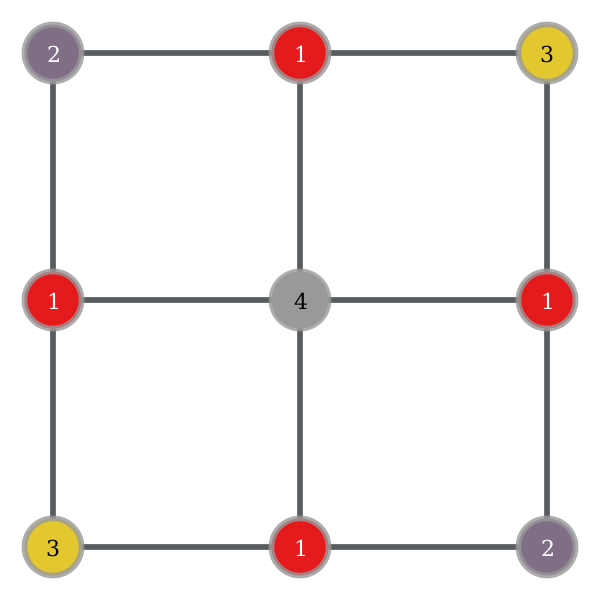

4
[2 1 3 1 4 1 3 1 2]


In [3]:
square_grid_ts_pcoloring(3, file_name="../Report/Pictures/TS_G3-3.pdf", out_size=(105, 150))

# Packing coloration of 24x24 grid using TS

21
20
21


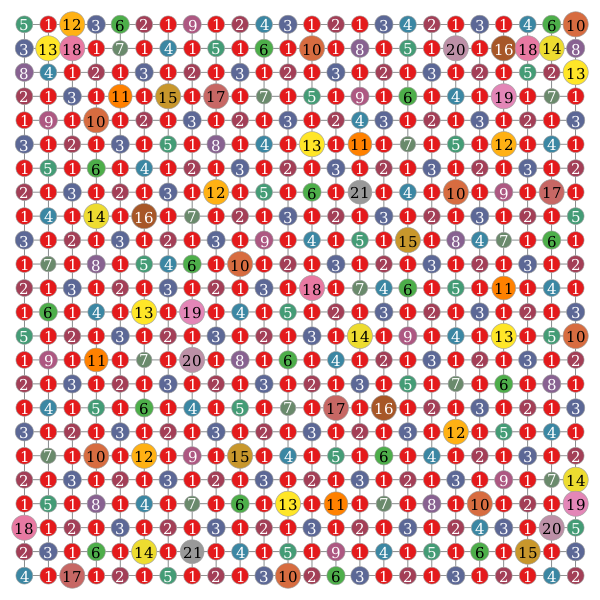

21
[ 5  3  8  2  1  3  1  2  1  3  1  2  1  5  1  2  1  3  1  2  1 18  2  4  1
 13  4  1  9  1  5  1  4  1  7  1  6  1  9  1  4  1  7  1  5  1  3  1 12 18
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1 17  3  1  2
  1 10  1  6  1 14  1  8  1  4  1 11  1  5  1 10  1  8  1  6  1  6  7  1 11
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2
  1  4  1 16  1  5  1 13  1  7  1  6  1 12  1  4  1 14  1  1  4  1 15  1  5
  1  3  1  2  4  3  1  2  1  3  1  2  1  3  1  2  1  5  9  1  2  1  3  1  2
  1  7  1  6  1 19  1 20  1  4  1  9  1  7  1 21  1  1  5  1 17  1  8  1 12
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2  1  3  1  2
  1 10  1  4  1  8  1  5  1 15  1  6  1  4  1  4  6  1  7  1  4  1  5  1  9
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  3  1  2  1  3  1  2  1  3  1  2
  1  5  1  6  1  7  1  4  1 13  1  5 10  1 10  1  5  1 13  1  6  1  4  1 18
  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2  1  3  1  2  1  3  1  2
  1  4  1

In [6]:
square_grid_ts_pcoloring(24, file_name="../Report/Pictures/TS_G24-24.pdf", out_size=(500, 500), font_size=15)

12
11
12
11
12
11
12
11
12
11


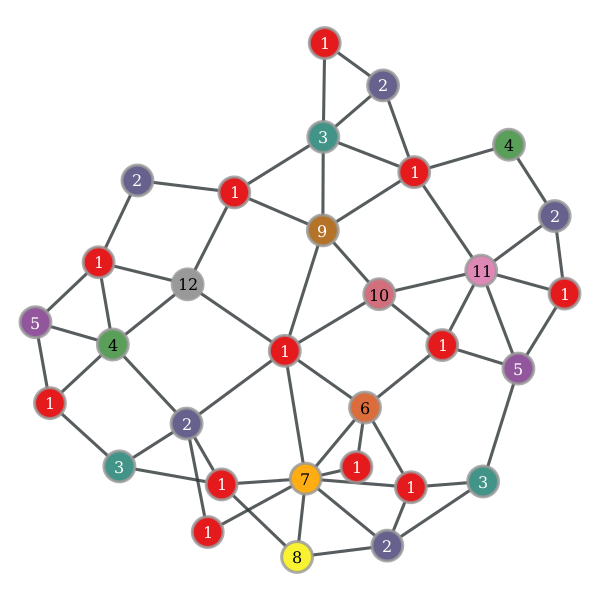

12
[ 2  7  1  2  4  6  1 12  1  5  1  8 10  9  1  2  1 11  1  3  2  4  1  2  1
  3  1  5  3  1  1]


In [7]:
random_ts_pcoloring(file_name="../Report/Pictures/TS_Random.pdf", out_size=(250,250), font_size=16)